This notebook contains an attempt at modeling for our first run at clean training data.

In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modeling function import
from model import modeling_reg

# import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# imports for classifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
# read in data for batters and pitchers
batters = pd.read_csv('../Modeling_Data/batter_data_modeling.csv')

Testing across multiple regressors from sklearn to gage starting point.

In [3]:
# instaniate all models
linreg = LinearRegression()
knn = KNeighborsRegressor()
svc = SVR()
forest = RandomForestRegressor()
tree = DecisionTreeRegressor()
abc = AdaBoostRegressor()
bag = BaggingRegressor()

In [4]:
# create list of classifiers
class_list = [linreg, knn, svc, forest, tree, abc, bag]

In [5]:
# set X , y 
X = batters.drop(columns=['Name','Team','POS','FPPG', 'PTS'])
y = batters['FPPG']

In [6]:
# TTS
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [7]:
# create results df using modeling fuction that fits and scores each model
results = modeling_reg(X_train, X_test, y_train, y_test, class_list)

In [8]:
# print results
results

,train_score,test_score,RMSE
LinearRegression(),0.923670,0.951502,0.675852
KNeighborsRegressor(),0.937748,0.919680,0.869761
SVR(),0.844833,0.868725,1.111935
RandomForestRegressor(),0.987290,0.931479,0.803342
DecisionTreeRegressor(),1.000000,0.829465,1.267348
AdaBoostRegressor(),0.918981,0.894837,0.995222
BaggingRegressor(),0.983104,0.919381,0.871378


In [9]:
batters['FPPG'].mean()

7.076754267130587

In [10]:
batters['Proj_FPPG'] = linreg.predict(X)

In [11]:
batters['Proj_FPPG'].mean()

7.049477849593563

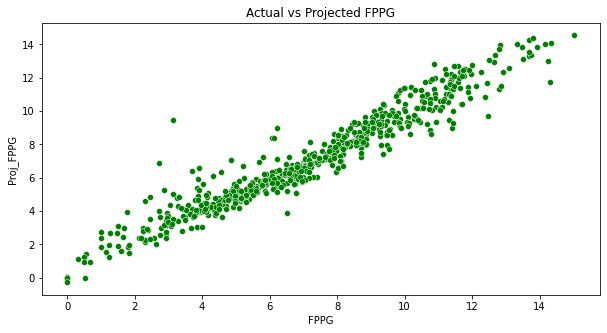

In [12]:
# plot prpjections against actuals
plt.figure(figsize=(10,5))
sns.scatterplot(x=batters['FPPG'], y=batters['Proj_FPPG'], color='green')
plt.title('Actual vs Projected FPPG');

Really good model how does it do on truely unseen data.

In [13]:
# read in clean testing data
batter_21 = pd.read_csv('../Modeling_Data/batter_test_data.csv')

In [14]:
# drop columns so as to same shape as X
testing = batter_21.drop(columns=['Name','TEAM','POS','FPPG', 'PTS'])

In [15]:
# create projections for testing (2021) data based on model fit with train (2019-2020)
batter_21['Proj_FPPG'] = linreg.predict(testing)

In [16]:
# baseline mean of 2021 data
batter_21['FPPG'].mean()

7.006965259320823

In [17]:
# projected mean of 2021 data
batter_21['Proj_FPPG'].mean()

5.848908164026537

In [18]:
# RMSE
mean_squared_error(batter_21['FPPG'], batter_21['Proj_FPPG'], squared=False)

2.4639091251852214

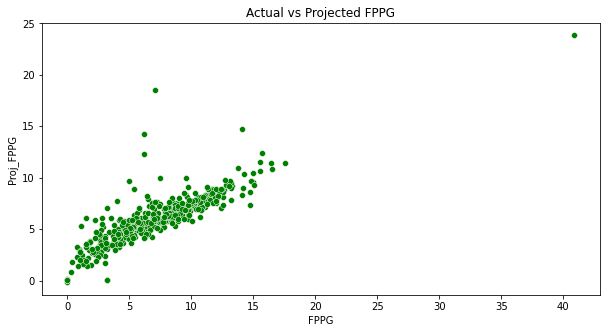

In [19]:
# plot prpjections against actuals testing data
plt.figure(figsize=(10,5))
sns.scatterplot(x=batter_21['FPPG'], y=batter_21['Proj_FPPG'], color='green')
plt.title('Actual vs Projected FPPG');

In [20]:
# check out outlier
batter_21.loc[batter_21['Proj_FPPG']>19]

,Name,TEAM,POS,GMS,AB,R,H,2B,3B,HR,...,SB,CS,TB,AVG,OBP,SLG,OPS,PTS,FPPG,Proj_FPPG
376,Jacob Nottingham,MIL,C,1,4,2,2,0,0,2,...,0,0,8,0.5,0.5,2.0,2.5,40.9,40.9,23.842438


In [21]:
# save projections on test to csv
batter_21.to_csv('../Projections/batter_projections_2021.csv', index=False)

In [26]:
# dataframe of coefs
coef_df = pd.DataFrame(zip(X.columns, linreg.coef_), columns=['Feature', 'Coeficient'])
coef_df.sort_values(by='Coeficient', inplace=True)

In [27]:
coef_df

,Feature,Coeficient
13,AVG,-6.567125
0,GMS,-0.046582
11,CS,-0.024236
5,3B,-0.021184
12,TB,-0.012566
3,H,-0.007941
8,BB,-0.003506
4,2B,0.000530
9,SO,0.006267
6,HR,0.012404


Based on these coefficients I think we may need to scale the data to get all features on the same scale.  Then pull coefficient value to determine importance.

In [30]:
# scaling attempt
from sklearn.preprocessing import StandardScaler

In [31]:
sc = StandardScaler()

In [33]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [34]:
# run scaled data through modeling function
results = modeling_reg(X_train_sc, X_test_sc, y_train, y_test, class_list)

In [35]:
results

,train_score,test_score,RMSE
LinearRegression(),0.939183,0.896475,0.907008
KNeighborsRegressor(),0.920890,0.857341,1.064727
SVR(),0.945784,0.909031,0.850227
RandomForestRegressor(),0.987833,0.897476,0.902615
DecisionTreeRegressor(),1.000000,0.785587,1.305312
AdaBoostRegressor(),0.931611,0.866742,1.029046
BaggingRegressor(),0.982045,0.893669,0.919221


In [36]:
# dataframe of coefs
coef_df = pd.DataFrame(zip(X.columns, linreg.coef_), columns=['Feature', 'Coeficient'])
coef_df.sort_values(by='Coeficient', inplace=True)

In [37]:
coef_df

,Feature,Coeficient
0,GMS,-3.108641
3,H,-1.081870
12,TB,-0.668512
13,AVG,-0.402716
6,HR,-0.133050
8,BB,-0.111334
4,2B,-0.101351
5,3B,-0.078644
11,CS,-0.061146
10,SB,0.300707
